# Pymaceuticals Inc.
---

### Analysis

- The bar graph depicted that the drug Regimen 'Capomulin' has the maximum mice number and Propriva has the lowest number of mice.

- It was also established from the boxplot that Ramicane was the only drug regimen that performed better than Capomulin in terms of treatment.

- The scatter plot and the linear regression statistics depicted a strong correlation between the mouse weight and average tumor volume (i.e 0.84), which is a strong positive correlation, when the mouse weight increases the average tumor volume increases.

- The sex representation was balanced as it was shown in the pie chart that 51% of male were tested and 49% percent of female were tested.

- From the selected drug regimen, it was depicted that capomulin and Ramicane reduces the size of the tumor better.

 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [76]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [77]:
# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [78]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"].value_counts())
total_mice

249

In [79]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.duplicated(subset=["Mouse ID", "Timepoint", "Tumor Volume (mm3)"], keep=False)
duplicate_mice_ID = combined_data_df.loc[duplicate_mice, "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [80]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data_df.loc[combined_data_df["Mouse ID"] == duplicate_mice_ID[0], :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_df.drop(duplicate_mice_df.index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [82]:
# Checking the number of mice in the clean DataFrame.
total_cleaned_mice = len(cleaned_df["Mouse ID"].unique())
total_cleaned_mice

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_summary = combined_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_summary

median_summary = combined_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_summary

variance_summary = combined_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_summary

standev_summary = combined_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standev_summary

sem_summary = combined_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_summary

# Assemble the resulting series into a single summary DataFrame.

statistics_summary=pd.DataFrame({
    "Mean Tumor Volume": mean_summary,
    "Median Tumor Volume": median_summary,
    "Tumor Volume Variance": variance_summary,
    "Tumor Volume Std. Dev.": standev_summary,
    "Tumor Volume Std. Err.": sem_summary
})

statistics_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_summary_df = combined_data_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
new_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

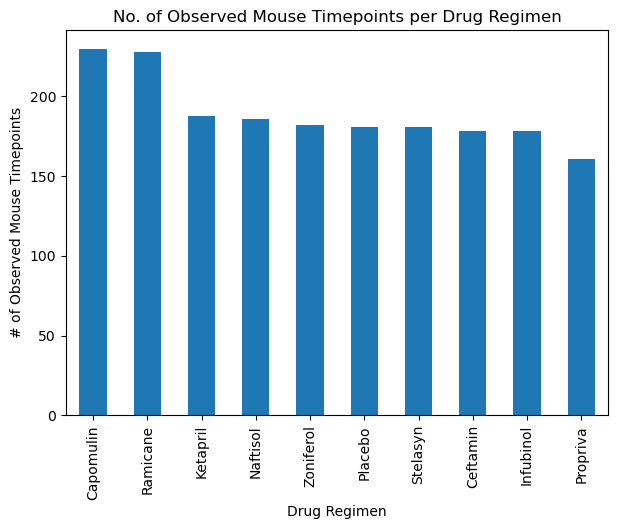

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug_reg = combined_data_df.groupby(["Drug Regimen"]).count()["Timepoint"]

barplot_mice_pandas = mice_drug_reg.sort_values(ascending=False).plot(kind = "bar", figsize=(7,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("No. of Observed Mouse Timepoints per Drug Regimen")


plt.show()            

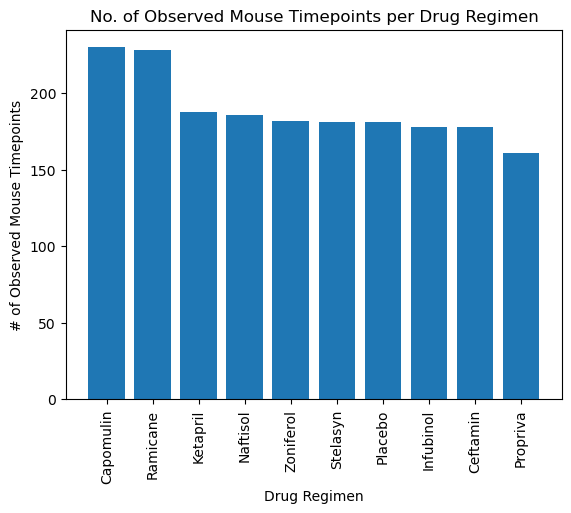

<Figure size 640x480 with 0 Axes>

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = combined_data_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_counts))

plt.bar(x_axis, drug_counts)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_counts.index.values, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("No. of Observed Mouse Timepoints per Drug Regimen")

plt.show()
plt.tight_layout()

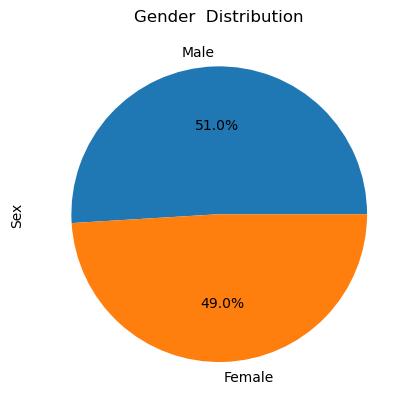

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_distribution = cleaned_df["Sex"].value_counts()
Gender_distribution_pie = Gender_distribution.plot(kind = "pie", y="Sex", autopct="%1.1f%%", title = "Gender  Distribution")

Text(0.5, 1.0, 'Gender Distribution')

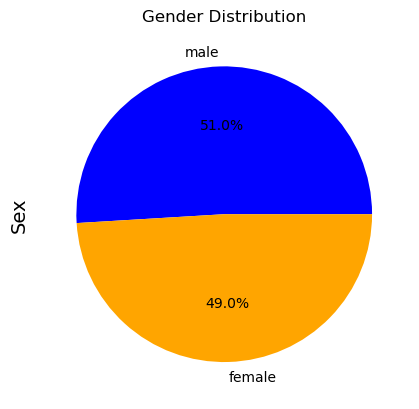

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['male','female']
Gender_distribution =  cleaned_df['Sex'].value_counts().tolist()
colors = ["blue", "orange"]
explode = (0,0)
plt.pie(Gender_distribution, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.ylabel("Sex", fontsize = 14)
plt.title('Gender Distribution')

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df =cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = cleaned_df.groupby(['Drug Regimen', 'Mouse ID']).last()
last_timepoint_df

Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Drug Regimen Mouse ID                                                    
Capomulin    b128             45           38.982878                 2   
             b742             45           38.939633                 0   
             f966             20           30.485985                 0   
             g288             45           37.074024                 1   
             g316             45           40.159220                 2   
...                          ...                 ...               ...   
Zoniferol    q633             45           70.827796                 2   
             s337             45           62.109651                 4   
             w140              5           47.717952                 0   
             w575             45           68.401286                 3   
             x613             15           48.077646                 0   

                          Sex  Age_months  Weight (g)  
Drug Regimen Mouse ID                                  
Capomulin    b128      Female           9          22  
             b742        Male           7          21  
             f966        Male          16          17  
             g288        Male           3          19  
             g316      Female          22          22  
...                       ...         ...         ...  
Zoniferol    q633        Male          12          25  
             s337        Male          14          27  
             w140      Female          19          30  
             w575      Female          16          28  
             x613      Female           2          29  

[248 rows x 6 columns]

In [90]:
# Put treatments into a list for for loop (and later for plot labels)
final_tumor_df = last_timepoint_df.reset_index()
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
new_list = []

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    drug_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] 
    new_list.append(drug_df)
    new_list 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = drug_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = drug_df.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = drug_df.loc[(drug_df < lower_bound) | (drug_df > upper_bound)]
    print(f'{drug}Regimen: {outliers}')

CapomulinRegimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
RamicaneRegimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
InfubinolRegimen: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
CeftaminRegimen: Series([], Name: Tumor Volume (mm3), dtype: float64)


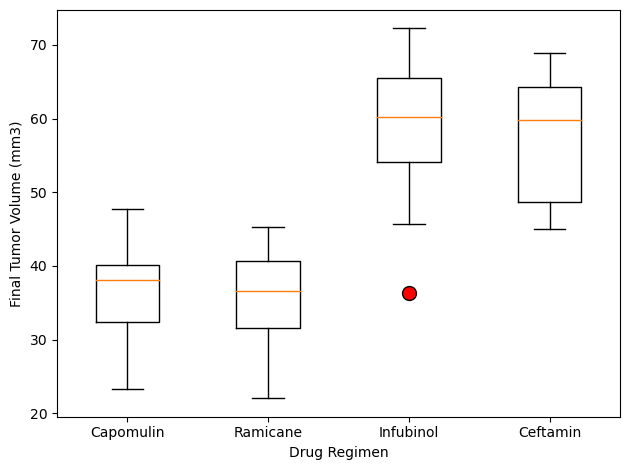

In [91]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_plot = plt.subplots()
final_plot.boxplot(new_list, labels=drug_list, flierprops={'markerfacecolor':'r','markersize': 10})
final_plot.set_xlabel('Drug Regimen')
final_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()

## Line and Scatter Plots

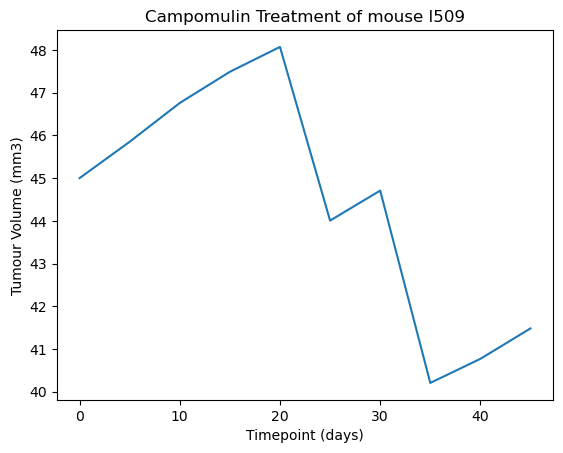

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
z = combined_data_df.loc[combined_data_df['Mouse ID'] == 'l509']
plt.plot(z['Timepoint'], z['Tumor Volume (mm3)'])
plt.ylabel("Tumour Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Campomulin Treatment of mouse l509")
plt.show()

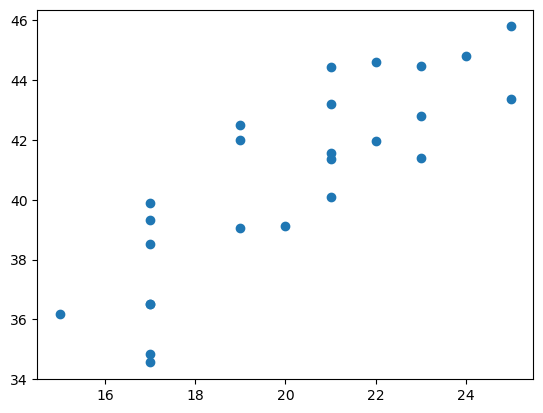

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
avg_capo = Capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

plt.scatter(avg_capo["Weight (g)"],avg_capo["Tumor Volume (mm3)"] )

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


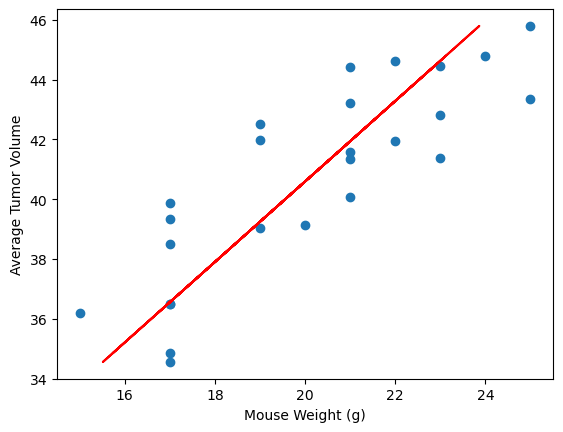

In [94]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_capo = avg_capo.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
tv = avg_capo["Tumor Volume (mm3)"]
weight = avg_capo["Weight (g)"]
correlation = st.pearsonr(tv,weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(tv, weight)
regress_values = tv * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tv)
plt.plot(regress_values,tv,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()